### Steps taken while gathering the data

At first, I extract data using the following SQL commands<br>
<i>SELECT * FROM city_data</i> <br>
<i>SELECT * FROM city_list </i> <br>
<i>SELECT * FROM global_data </i> <br>

I have used the python and the data science libraries (seaborn, matplotlib, pandas) to analyze the dataset to familar with the syntax and workflow of the python.

<h4> Finding the moving average in the dataset </h4>

In this step, I used the excel to select the first ten years average temperature data to calculate the ten years moving  average to smooth the data as well as the data visualization. Then, I used the same formula in every row to calculate the required moving average.

<h3> Global Temperature vs Kathmandu City Temperature </h3>

#### Importing necessary libraries and reading the data of global and local temperature 

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_global = pd.read_csv("global_data.csv")
df_local = pd.read_csv('city_data.csv')

<h4> View the five row of the data in global </h4>

In [45]:
print(df_global.head())

   year  avg_temp  ten_year_ma
0  1750      8.72          NaN
1  1751      7.98          NaN
2  1752      5.78          NaN
3  1753      8.39          NaN
4  1754      8.47          NaN


In [71]:
df_global.describe()

,year,avg_temp,ten_year_ma
count,266.000000,266.000000,256.000000
mean,1882.500000,8.369474,8.352173
std,76.931788,0.584747,0.445764
min,1750.000000,5.780000,7.236364
25%,1816.250000,8.082500,8.056136
50%,1882.500000,8.375000,8.270455
75%,1948.750000,8.707500,8.635909
max,2015.000000,9.830000,9.603636


In [47]:
df_global.isnull().sum()

year            0
avg_temp        0
ten_year_ma    10
dtype: int64

### Descriptive analysis of the local data (Kathmandu)

In [92]:
df_kat.describe()

,year,avg_temp,ten_year_ma
count,218.000000,206.000000,208.000000
mean,1904.500000,14.663592,14.625382
std,63.075352,0.539040,0.402169
min,1796.000000,13.250000,13.520000
25%,1850.250000,14.370000,14.396818
50%,1904.500000,14.655000,14.673636
75%,1958.750000,15.005000,14.879318
max,2013.000000,16.560000,15.540909


In [49]:
df_local.shape

(70792, 5)

In [50]:
df_kat = df_local.loc[df_local['city'] == "Kathmandu"]

In [51]:
df_kat.iloc[:10,:]

,year,city,country,avg_temp,ten_year_ma
30876,1796,Kathmandu,Nepal,14.51,NaN
30877,1797,Kathmandu,Nepal,15.88,NaN
30878,1798,Kathmandu,Nepal,14.33,NaN
30879,1799,Kathmandu,Nepal,14.76,NaN
30880,1800,Kathmandu,Nepal,14.69,NaN
30881,1801,Kathmandu,Nepal,14.26,NaN
30882,1802,Kathmandu,Nepal,15.10,NaN
30883,1803,Kathmandu,Nepal,14.85,NaN
30884,1804,Kathmandu,Nepal,15.15,NaN
30885,1805,Kathmandu,Nepal,14.78,NaN


In [52]:
df_kat['city'].isnull().count()

218

In [53]:
df_calif = df_local.loc[df_local['city']=="Miami"]

In [54]:
df_calif.head()

,year,city,country,avg_temp,ten_year_ma
41041,1758,Miami,United States,23.05,NaN
41042,1759,Miami,United States,22.56,NaN
41043,1760,Miami,United States,15.14,NaN
41044,1761,Miami,United States,NaN,NaN
41045,1762,Miami,United States,NaN,NaN


<h4>218 average temperature values are missing in the dataset.</h4>
<h4>In the columns <i>ten_year_ma</i>, there are the 218 number of null values. The null values indicated that the temperature is not recorded or stored in the dataset. Running average is calculated for the span of the 10 years running from <i>1796 to 2013</i></h4>

In [55]:
df_local['ten_year_ma'].describe()

count    454.000000
mean      19.181180
std        4.216436
min       13.520000
25%       14.708636
50%       22.578182
75%       23.055909
max       23.883333
Name: ten_year_ma, dtype: float64

<h4> Graph of the global temperatur over time </h4>

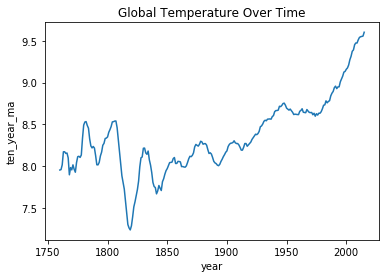

In [70]:
temp_chart = sns.lineplot(x="year",y="ten_year_ma",data=df_global).set_title('Global Temperature Over Time')

<h4> Graph of the kathmandu temperature over time </h4>

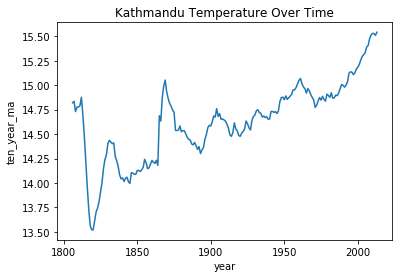

In [57]:
temp_chart = sns.lineplot(x="year",y="ten_year_ma",data=df_kat).set_title('Kathmandu Temperature Over Time')

<h4> Graph of the Miami temperature over time </h4>

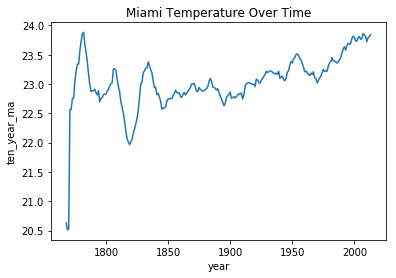

In [58]:
temp_chart = sns.lineplot(x="year",y="ten_year_ma",data=df_calif).set_title('Miami Temperature Over Time')

<b>Observation</b><br>

The city Miami had extreme temperature increase in the mid 1700 and substantial drop in the temperature in the early of the mid 1800.

It made me clear that there will be rise in temperature as looking to the current trends of the global as well the miami average temperature rise.

In [69]:
(df_kat['year']).describe()

count     218.000000
mean     1904.500000
std        63.075352
min      1796.000000
25%      1850.250000
50%      1904.500000
75%      1958.750000
max      2013.000000
Name: year, dtype: float64

In [68]:
(df_global['year']).describe()

count     266.000000
mean     1882.500000
std        76.931788
min      1750.000000
25%      1816.250000
50%      1882.500000
75%      1948.750000
max      2015.000000
Name: year, dtype: float64

<h3> Temperature trends between kathmandu and global </h3>

<b><i> Observation 1: Similarities in the temperature trends </i></b>
<p> The lowest temperature of the kathmandu city in the year of 1819 whereas the lowest temperature globally  is in the year of 1817. This means that the temperature drop locally and globally simulateneously</p>


<b><i>  Observation 2: Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time? </i></b>

The Kathmandu city is getting hotter: 15.54 degree celsius at latest while the global temperature had 9.60 degree celsius. There is the extreme positive correlation betweet the year and the temperature. This likely to be conclude that the global temperature and kathmandu temperature is getting hotter over time.

#### Observation 3

From the graph, in the year 1900, it seems like both the global and the kathmandu weather was getting hotter year by year. The overall trend of the weather is likely to be increase in the temperature in coming years may bring challenges like climate change, in consequences increasing the sea level.

#### Observation 4

In the year between the 1800 to the 1850, the weather were inconsistent, meaning that there is extreme increase as well as decrease in temperature. 

From <a href="https://en.wikipedia.org/wiki/Global_temperature_record">global data temperature</a> wikipedia page, I found that extreme fluctuations in the temperature during the year 1800 to the 1850 is mainly because of the fact that there were no any precised instrument to measure the temperature. As always, I noted that the invention of the thermometers was in the year of the 1850. May the data recorded from the 1800 and the 1850 is not precised as it from the 1850 and onwards.